# Imports

In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf

# Load data

Reference : https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2

Data source : https://www.kaggle.com/tungxnguyen/corrosionannotated 

In [2]:
# Install kaggle package
#!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

# Create ~/.kaggle folder and move kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d tungxnguyen/corrosionannotated

Saving kaggle.json to kaggle.json
 61% 28.0M/46.2M [00:00<00:00, 33.4MB/s]
100% 46.2M/46.2M [00:00<00:00, 59.4MB/s]


In [3]:
!ls

corrosionannotated.zip	kaggle.json  sample_data


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/corrosionannotated.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
!mv /content/JPEGImages /content/images
!mv /content/SegmentationClassPNG/ /content/masks
!ls

corrosionannotated.zip	images	kaggle.json  masks  sample_data


# Data Preprocessing

## Make list of every image's path

In [6]:
images_dir = "/content/images"
masks_dir = "/content/masks"

images = sorted([os.path.join(images_dir, fname) for fname in os.listdir(images_dir) if fname.endswith(".jpg")])
masks = sorted([os.path.join(masks_dir, fname) for fname in os.listdir(masks_dir) if fname.endswith(".png")])

print(images)
print(masks)

print(f"Total images and masks: {len(images)} - {len(masks)}")

['/content/images/IMG_0112.jpg', '/content/images/img0.jpg', '/content/images/img1.jpg', '/content/images/img10.jpg', '/content/images/img100.jpg', '/content/images/img101.jpg', '/content/images/img102.jpg', '/content/images/img103.jpg', '/content/images/img104.jpg', '/content/images/img105.jpg', '/content/images/img106.jpg', '/content/images/img107.jpg', '/content/images/img108.jpg', '/content/images/img109.jpg', '/content/images/img11.jpg', '/content/images/img110.jpg', '/content/images/img111.jpg', '/content/images/img112.jpg', '/content/images/img113.jpg', '/content/images/img114.jpg', '/content/images/img115.jpg', '/content/images/img116.jpg', '/content/images/img117.jpg', '/content/images/img119.jpg', '/content/images/img12.jpg', '/content/images/img120.jpg', '/content/images/img121.jpg', '/content/images/img122.jpg', '/content/images/img123.jpg', '/content/images/img124.jpg', '/content/images/img125.jpg', '/content/images/img126.jpg', '/content/images/img127.jpg', '/content/imag

## Example image and mask

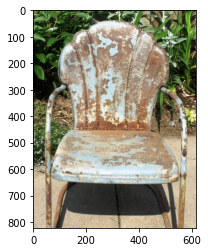

(822, 616, 3)

In [7]:
exp_img = cv2.imread("/content/images/img0.jpg")
exp_img = cv2.cvtColor(exp_img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(exp_img)
plt.show()

exp_img.shape

In [8]:
np.array(exp_img)

array([[[ 73, 128,  47],
        [ 77, 126,  47],
        [ 69, 105,  33],
        ...,
        [  3,  27,   0],
        [  8,  27,   0],
        [ 11,  30,   0]],

       [[ 71, 126,  45],
        [ 77, 126,  47],
        [ 73, 109,  37],
        ...,
        [ 12,  34,   0],
        [ 11,  30,   0],
        [  9,  28,   0]],

       [[ 74, 127,  47],
        [ 78, 125,  47],
        [ 78, 111,  40],
        ...,
        [ 32,  52,  15],
        [ 24,  41,   7],
        [ 17,  34,   0]],

       ...,

       [[209, 193, 168],
        [195, 179, 154],
        [182, 166, 141],
        ...,
        [221, 204, 176],
        [228, 213, 184],
        [238, 223, 194]],

       [[202, 186, 161],
        [183, 167, 142],
        [177, 161, 136],
        ...,
        [207, 190, 162],
        [223, 208, 179],
        [242, 227, 198]],

       [[196, 180, 155],
        [181, 165, 140],
        [188, 172, 147],
        ...,
        [191, 174, 146],
        [219, 204, 175],
        [246, 231, 202]]

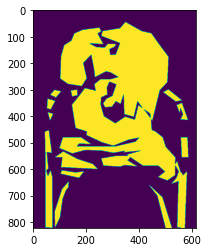

(822, 616)

In [9]:
exp_mask = cv2.imread("/content/masks/img0.png", cv2.IMREAD_GRAYSCALE)

import matplotlib.pyplot as plt
plt.imshow(exp_mask)
plt.show()

exp_mask.shape

In [10]:
np.array(exp_mask)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Split data

In [11]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_mask, test_mask = train_test_split(images, masks, test_size=0.2, random_state=42)

In [12]:
print(train_img)
print(train_mask)

print(f"Total train images and masks: {len(train_img)} - {len(train_mask)}")
print(f"Total test images and masks: {len(test_img)} - {len(test_mask)}")

['/content/images/img132.jpg', '/content/images/img23.jpg', '/content/images/img175.jpg', '/content/images/img148.jpg', '/content/images/img74.jpg', '/content/images/img193.jpg', '/content/images/img226.jpg', '/content/images/img214.jpg', '/content/images/img152.jpg', '/content/images/img190.jpg', '/content/images/img41.jpg', '/content/images/img98.jpg', '/content/images/img213.jpg', '/content/images/img244.jpg', '/content/images/img230.jpg', '/content/images/img197.jpg', '/content/images/img31.jpg', '/content/images/img164.jpg', '/content/images/img202.jpg', '/content/images/img85.jpg', '/content/images/img160.jpg', '/content/images/img228.jpg', '/content/images/img199.jpg', '/content/images/img203.jpg', '/content/images/png0.jpg', '/content/images/img201.jpg', '/content/images/img97.jpg', '/content/images/img180.jpg', '/content/images/img124.jpg', '/content/images/img72.jpg', '/content/images/img173.jpg', '/content/images/img20.jpg', '/content/images/img101.jpg', '/content/images/img

## Process the images and masks



In [13]:
def preprocessing(image_path, mask_path):
    def f(image_path, mask_path):
        # Image processing
        image_path = image_path.decode()
        x = cv2.imread(image_path, cv2.IMREAD_COLOR)
        x = cv2.resize(x, (256, 256))
        x = x / 255.0
        x = x.astype(np.float32)

        # Masks processing
        mask_path = mask_path.decode()
        y = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        y = cv2.resize(y, (256, 256))
        y = y/255.0
        y = y.astype(np.float32)
        y = np.expand_dims(y, axis=-1)

        return x, y

    image, mask = tf.numpy_function(f, [image_path, mask_path], [tf.float32, tf.float32])
    image.set_shape([256, 256, 3])
    mask.set_shape([256, 256, 1])

    return image, mask

batch_size = 2

train_dataset = tf.data.Dataset.from_tensor_slices((train_img, train_mask))
train_dataset = train_dataset.map(preprocessing, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=250).batch(batch_size)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_img, test_mask))
test_dataset = test_dataset.map(preprocessing, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size)

print(len(train_dataset))
print(len(test_dataset))

101
26


# Model : U-Net

In [14]:
#Build model
inputs = tf.keras.layers.Input((256, 256, 3))

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
#model.summary()

# Training

In [15]:
epochs = 10

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset)

Epoch 1/10
101/101 [==============================] - 41s 34ms/step - loss: 0.2217 - accuracy: 0.6556 - val_loss: 0.1975 - val_accuracy: 0.6405
Epoch 2/10
101/101 [==============================] - 7s 27ms/step - loss: 0.1898 - accuracy: 0.6612 - val_loss: 0.2111 - val_accuracy: 0.6405
Epoch 3/10
101/101 [==============================] - 7s 27ms/step - loss: 0.1871 - accuracy: 0.6612 - val_loss: 0.1886 - val_accuracy: 0.6405
Epoch 4/10
101/101 [==============================] - 7s 28ms/step - loss: 0.1823 - accuracy: 0.6612 - val_loss: 0.1883 - val_accuracy: 0.6405
Epoch 5/10
101/101 [==============================] - 7s 28ms/step - loss: 0.1840 - accuracy: 0.6612 - val_loss: 0.1923 - val_accuracy: 0.6405
Epoch 6/10
101/101 [==============================] - 7s 28ms/step - loss: 0.1818 - accuracy: 0.6612 - val_loss: 0.1865 - val_accuracy: 0.6405
Epoch 7/10
101/101 [==============================] - 7s 28ms/step - loss: 0.1790 - accuracy: 0.6612 - val_loss: 0.1881 - val_accuracy: 0.640

# Predict

In [16]:
from tqdm import tqdm

In [29]:
!mkdir save_images

In [25]:
#Upload images to test images directory
from google.colab import files
files.upload()

Saving 000007.jpg to 000007.jpg


{'000007.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xed\x00\xd0Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x98\x1c\x02x\x00\x1brust, metal, sheet, texture\x1c\x02s\x00\x12https://pixnio.com\x1c\x02n\x00\x12https://pixnio.com\x1c\x02\x19\x00\x04rust\x1c\x02\x19\x00\x05metal\x1c\x02\x19\x00\x05sheet\x1c\x02\x19\x00\x07texture\x1c\x02\x05\x00\x1brust, metal, sheet, texture\x008BIM\x04%\x00\x00\x00\x00\x00\x10\xf8g\xcd\xf4\xcd\x81\x03dHn\xed\x99\x1f\xe5\xd3O\xff\xe1 hExif\x00\x00II*\x00\x08\x00\x00\x00\x01\x00\x0e\x01\x02\x00\x1c\x00\x00\x00\x1a\x00\x00\x006\x00\x00\x00rust, metal, sheet, texture\x00\x03\x00\x03\x01\x03\x00\x01\x00\x00\x00\x06\x00\x00\x00\x01\x02\x04\x00\x01\x00\x00\x00`\x00\x00\x00\x02\x02\x04\x00\x01\x00\x00\x00\x00 \x00\x00\x00\x00\x00\x00\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x

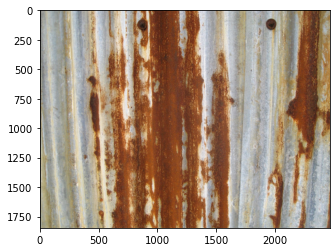

In [28]:
test_image = "/content/000007.jpg"
test = cv2.imread(test_image, cv2.IMREAD_COLOR)
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(test)
plt.show()

In [31]:
x = cv2.imread(test_image, cv2.IMREAD_COLOR)
original_image = x
h, w, _ = x.shape

x = cv2.resize(x, (256, 256))
x = x/255.0
x = x.astype(np.float32)

x = np.expand_dims(x, axis=0)
pred_mask = model.predict(x)[0]

pred_mask = np.concatenate(
    [
        pred_mask,
        pred_mask,
        pred_mask
    ], axis=2)
pred_mask = pred_mask * 255
pred_mask = pred_mask.astype(np.float32)
pred_mask = cv2.resize(pred_mask, (w, h))

original_image = original_image.astype(np.float32)

alpha = 0.8
cv2.addWeighted(pred_mask, alpha, original_image, 1-alpha, 0, original_image)

name = test_image.split("/")[-1]
    
cv2.imwrite(f"/content/save_images/{name}", original_image)


True

# Saving model

## Save model into HDF5 format

In [ ]:
model.save('/content/corrosion_segment_unet.hdf5')

## Save model into tflite format

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('/content/corrsegm_unetmodel.tflite', 'wb') as f:
  f.write(tflite_model)